# 1: Linear regression - Introduction

## A simple linear function

To understand **Machine Learning** concepts , consider a simple linear function of **x** as below:

$ y = f(x) $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (1) ... **simple linear function**

$ x $ = Input variable / Feature<br/>
$ y $ = Output variable / Target variable



Supervised Machine Learning algorithms outputs a **hypothesis**, which maps **x** to **y**. <br/>
In this linear relationship, we shall assume  the **hypothesis** is a **straight line function of x** as below:

$ h_\theta(x) = \theta_0 + \theta_1 x$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (2) ... **hypothesis**

where<br/>
$ \theta_0 $ and $\theta_1$ are the parameters of the model <br/>
$ h_\theta(x) $ is the predicted output for a given feature $x$

In the **linear regression machine learning**, the **hypothesis** $ h_\theta(x)$ is trained aganist a given set of $x$ to identified the values of the parameters $ \theta_0 $ and $\theta_1$. Once the parameters $ \theta_0 $ and $\theta_1$ are known for a given training set of feature $x$, the **hypothesis** $ h_\theta(x)$ should be able to predict any new values of the feature $x$.

The above model represents the linear regression with **one** variable which is also called **univariate linear regression**

## Cost function

From equations (1) and (2), we know that $y$ is the actual value and $ h_\theta(x)$ is the predicted value and we need to choose $\theta_0 and \theta_1$ such a way that  $ h_\theta(x)$ should be close to $y$ for the training set values $x$

Choose $min(\theta_i)$ such that  $(h_\theta(x) - y) \simeq 0 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (3) ... **Error function**

The $(h_\theta(x) - y)$ is also called as the error value.

Considering the squared errors to discard -ve values, the linear regression error function can be written as below for the training set $x$ of size $m$. Squared error function is also called as **Cost Function**

$  \underset {\theta_0, \theta_1} {minium} = J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (4) ... **Cost Function**

The **GOAL** of the linear regression is to choose the value of the **parameters** $\theta_0$ and $\theta_1$ that minimises the finction $J(\theta_0, \theta_1)$. Hence by finding the $J(\theta_0, \theta_1)$ **miminum** results in **best straight line regression line** for the given training set.

$  \underset {\theta_0, \theta_1} {minium}$ $J(\theta_0, \theta_1)$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (5) ... **Minimised Cost Function**


## Recap

**Simple linear function**: $ y = f(x) $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (1)

**Hypothesis**: $ h_\theta(x) = \theta_0 + \theta_1 x$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (2)

**Error function**: Choose $min(\theta_i)$ such that  $(h_\theta(x) - y) \simeq 0 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (3)

**Cost Function**: $  \underset {\theta_0, \theta_1} {minium} = J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (4)

**Minimised Cost Function**: $  \underset {\theta_0, \theta_1} {minium}$ $J(\theta_0, \theta_1)$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (5)

The **GOAL** of the linear regression is to choose the value of the **parameters** $\theta_0$ and $\theta_1$ that minimises the finction $J(\theta_0, \theta_1)$. Hence by finding the $J(\theta_0, \theta_1)$ **miminum** results in **best straight line regression line** for the given training set.


In [2]:

%matplotlib inline
#%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))


#### Overview
Linear Reg


In [8]:
data = np.loadtxt('../data/ex1data1.txt', delimiter=',')

In [4]:
x = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]


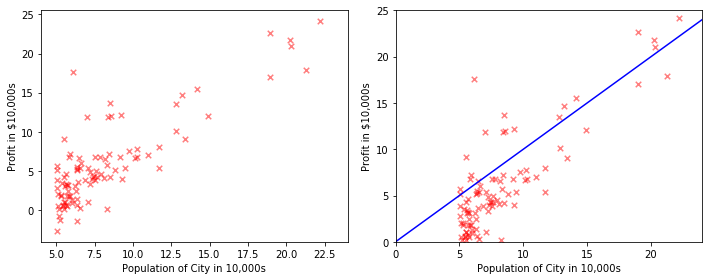

In [5]:
fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot2grid((1,8), (0,0), colspan=4)
ax1.scatter(x[:,1], y, s=30, c='r', marker='x', alpha=0.5, linewidths=1)
ax1.set_xlim(4,24)
ax1.set_xlabel('Population of City in 10,000s')
ax1.set_ylabel('Profit in $10,000s');
ax2 = plt.subplot2grid((1,8), (0,4), colspan=4)
ax2.scatter(x[:,1], y, s=30, c='r', marker='x', alpha=0.5, linewidths=1)
ax2.set_xlim(0,24)
ax2.set_ylim(0,25)
ax2.set_xlabel('Population of City in 10,000s')
ax2.set_ylabel('Profit in $10,000s');

x1 = np.linspace(0, 30, 20)
y1 = x1
ax2.plot(x1,y1, color='b')

fig.tight_layout()
plt.show() 

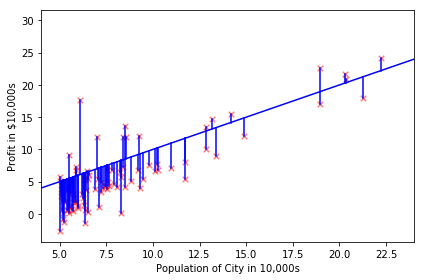

In [12]:
fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot2grid((1,4), (0,0), colspan=4)
ax1.scatter(x[:,1], y, s=30, c='r', marker='x', alpha=0.5, linewidths=1)
ax1.set_xlim(4,24)
ax1.set_xlabel('Population of City in 10,000s')
ax1.set_ylabel('Profit in $10,000s');
x1 = np.linspace(0, 30, 20)
y1 = x1
ax1.plot(x1,y1, color='b')

sdx = x[:,1]

#print(sdx)

for i, val in  enumerate(sdx):
    sx = val
    sy = y[i]
    
    lx = sx
    ly = lx
    lnp = np.linspace(ly,sy, 5)
    #print(lnp)
    ax1.plot([lx, lx, lx, lx,lx],lnp, color='b')
    

fig.tight_layout()
plt.show() 

## 2.2 Gradient Descent
Fit the linear regression parameters $\,\theta \,$ to the dataset using gradient descent equation:

$ J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} (h_\theta (x) - y)^2 \,\,\, where \,\,\, h_\theta (x) = \theta_0 + \theta_1 x $

Assuming, $\,\, \theta_0=0 \,\, $ which is nothing but the fit line passes through the origin:

$h_\theta (x) = \theta_1 x $

Substituting the $\,\,h_\theta (x)\,\,$, in the equation 1:

$ J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} (\theta_1 x  - y)^2$


In [13]:
def computeCost(x, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = x.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    #print(m)
    return(J)

In [14]:
computeCost(x,y)

32.072733877455676

In [15]:
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))


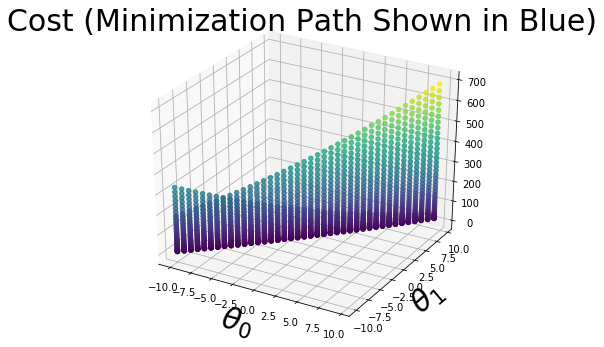

In [16]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(x,y,np.array([[david], [kaleko]])))

scat = ax.scatter(myxs,myxs,myzs,c=np.abs(myzs), alpha=0.8)

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
#plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()